# Metaheuristics
### Non Linear Optimization
###### Rafael Barsotti - 22/03/2020

###### Ackley function 

Objective:

$argmin(f(x,y))$

$f(x,y) := -20e^{-0.2\sqrt{0.5(x^2 + y^2)}} - e^{0.5((cos(2\pi x) + cos (2 \pi y))} + e + 20$ 

$-5 \leq x,y \leq 5$

Global Minimum at:

$f(0,0) = 0$

[Test Functions for Optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math as m
from IPython.display import Image
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')

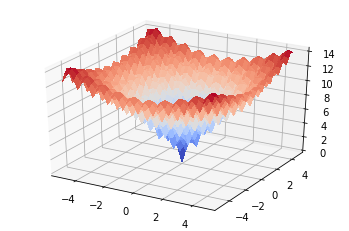

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (-20*np.e**(-0.2*np.sqrt(0.5*(X**2 + Y**2))) -np.e**(0.5*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))) + np.e + 20)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

### Gradient Descent

$a_n = a_n -\alpha  \nabla f(x,y)$

$\frac{\partial f(x,y)}{\partial x} = \frac{2.82843 x e^{-0.141421 \sqrt{x^2 + y^2}}}{\sqrt{x^2 + y^2}} + \pi sin(2 \pi x ) e^{0.5(cos(2 \pi x) + cos(2 \pi y))}$

$\frac{\partial f(x,y)}{\partial y} = \frac{2.82843 y e^{-0.141421 \sqrt{x^2 + y^2}}}{\sqrt{x^2 + y^2}} + \pi sin(2 \pi y ) e^{0.5(cos(2 \pi x) + cos(2 \pi y))}$

In [159]:
def f(x,y):
    z = (-20*np.e**(-0.2*np.sqrt(0.5*(x**2 + y**2))) -np.e**(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + np.e + 20)
    return z

def gradientDescent(x, y, max_iterations, alpha):
    for i in range(max_iterations):
        deltax = (2.82843*x*m.e**(-0.141421 * m.sqrt(x**2 + y**2)))/(m.sqrt(x**2 + y **2)) + \
            m.pi * m.sin(2*m.pi*x)*m.e**(0.5*(m.cos(2*m.pi*x) + m.cos(2*m.pi*y)))
        deltay = (2.82843*y*m.e**(-0.141421 * m.sqrt(x**2 + y**2)))/(m.sqrt(x**2 + y **2)) + \
            m.pi * m.sin(2*m.pi*y)*m.e**(0.5*(m.cos(2*m.pi*x) + m.cos(2*m.pi*y)))
        x = x -alpha*deltax
        y = y -alpha*deltay
        return [x,y]

x = np.random.uniform(-5,5)
y = np.random.uniform(-5,5)
print('Starting Point: {} \n f(x,y): {}'.format([x,y],f(x,y)))
ans = gradientDescent(x,y,10**8,0.001)
z = f(ans[0],ans[1])
print('Finishing Point: {} \n f(x,y): {}'.format(ans,z))

Starting Point: [4.720356062632469, 4.494607429855982] 
 f(x,y): 14.20896737926671
Finishing Point: [4.721248597311271, 4.493772666720049] 
 f(x,y): 14.207467208660498


### Simulated Annealing (SA)

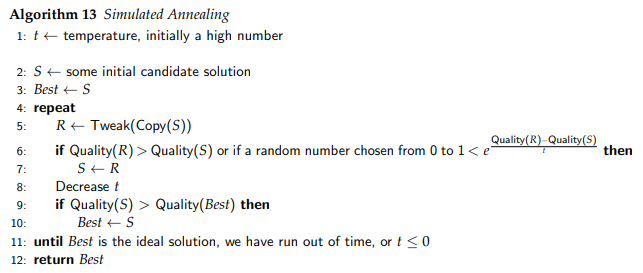

In [50]:
# SA Algorithm

In [164]:
# Tweak Function
# Use gradientDescent(x,y,max_iterations, alpha)

# Quality Function
# Use f(x,y)

# Probability Function
def p(t,R,S):
    prob = m.e**((R - S)/t)
    return prob

def startingPoint():
    sp = []
    while len(sp) < 2:
        sp.append(np.random.uniform(-5,5))
    return sp

def SA(temperature,max_iterations,alpha):
    S = startingPoint()
    z = f(S[0],S[1])
    print('Starting Point: {} \n f(x,y): {}'.format(S,z))
    best = S
    c = 0
    while temperature >= 0 and c <= max_iterations:
        R = gradientDescent(S[0],S[1],max_iterations,alpha)
        qualityR = f(R[0],R[1])
        qualityS = f(S[0],S[1])
        if qualityS > qualityR or np.random.uniform(0,1) < p(temperature,qualityS,qualityR):
            S = R
        temperature -= 1
        if qualityS < qualityR:
            best = S
        c += 1
    z = f(best[0],best[1])
    ans = 'Finishing Point: {} \n f(x,y): {}'.format(best,z)
    print(ans)

SA(10**3,10**3,0.001)

Starting Point: [-1.9176989454507765, 2.25044768536129] 
 f(x,y): 8.01067694949661
Finishing Point: [-1.9744519329940264, 1.9744519329940275] 
 f(x,y): 6.559645375628023
